# Long Short Term Memory

In [74]:
from whittaker_smooth import whittaker_smooth
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils

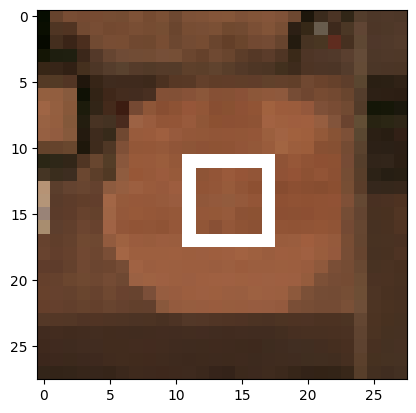

In [75]:
# TODO: Changes these values for parameters on a database.
BASE_DIR = '/home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/kansasData'
bands =  ['B4','B3','B2','B8']

# Dictionaries of the images.
images_kansas = utils.load_landsat_image(BASE_DIR, bands)
# Get the days after plant and the dates.
days_kansas, dates_kansas, hours_kansas = utils.images_time_info(images_kansas.keys(), initial_date = date(2019, 4, 1))
# Calculate the NDVI series over the crops.
ndvi_series_kansas = utils.generate_ndvi_time_series(images_kansas)
# Apply a Whittaker Smooth filter.
ndvi_smooth_kansas = whittaker_smooth(np.array(ndvi_series_kansas), lmbd=10)

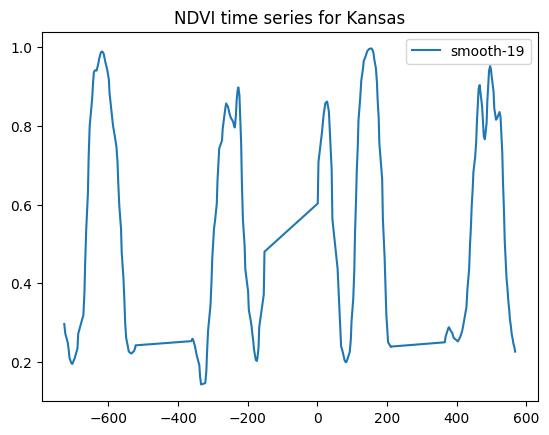

In [76]:
plt.title('NDVI time series for Kansas')
plt.plot(days_kansas, ndvi_smooth_kansas, label='smooth-19')
plt.legend()
plt.show()

In [77]:
# Apply an interpolation by splines.
x_, y_ = utils.interpolate_curve(days_kansas, ndvi_smooth_kansas)

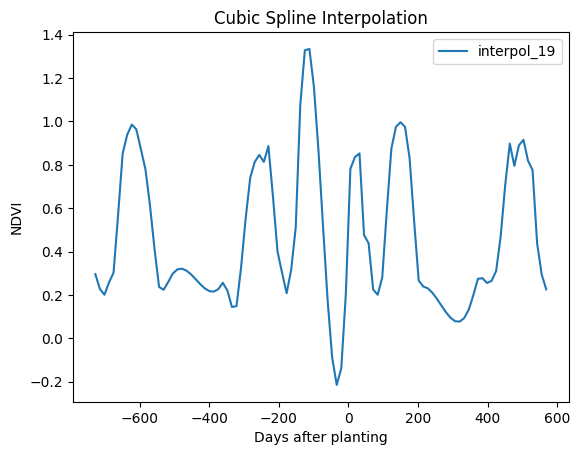

In [78]:
plt.plot(x_, y_, label='interpol_19')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Days after planting')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [79]:
# TODO: Changes these values for parameters on a database.
BASE_DIR = '/home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/kansas'
bands =  ['B4','B3','B2','B8']

# Dictionaries of the images.
images_kansas19 = utils.load_landsat_image(BASE_DIR + '19', bands)
images_kansas20 = utils.load_landsat_image(BASE_DIR + '20', bands)
images_kansas21 = utils.load_landsat_image(BASE_DIR + '21', bands)
images_kansas22 = utils.load_landsat_image(BASE_DIR + '22', bands)

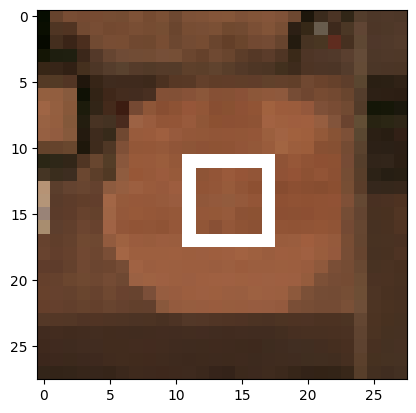

In [80]:
# Get the days after plant and the dates.
days_19, dates_19, hours_19 = utils.images_time_info(images_kansas19.keys(), initial_date = date(2019, 4, 5))
days_20, dates_20, hours_20 = utils.images_time_info(images_kansas20.keys(), initial_date = date(2020, 4, 4))
days_21, dates_21, hours_21 = utils.images_time_info(images_kansas21.keys(), initial_date = date(2021, 4, 2))
days_22, dates_22, hours_22 = utils.images_time_info(images_kansas22.keys(), initial_date = date(2022, 4, 2))

# Calculate the NDVI series over the crops.
ndvi_series_19 = utils.generate_ndvi_time_series(images_kansas19)
ndvi_series_20 = utils.generate_ndvi_time_series(images_kansas20)
ndvi_series_21 = utils.generate_ndvi_time_series(images_kansas21)
ndvi_series_22 = utils.generate_ndvi_time_series(images_kansas22)

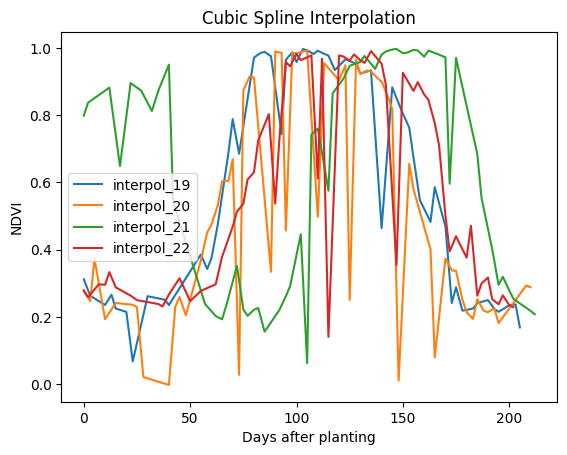

In [81]:
plt.plot(days_19, ndvi_series_19, label='interpol_19')
plt.plot(days_20, ndvi_series_20, label='interpol_20')
plt.plot(days_21, ndvi_series_21, label='interpol_21')
plt.plot(days_22, ndvi_series_22, label='interpol_22')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Days after planting')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [82]:
# Apply a Whittaker Smooth filter.
ndvi_smooth_19 = whittaker_smooth(np.array(ndvi_series_19), lmbd=10)
ndvi_smooth_20 = whittaker_smooth(np.array(ndvi_series_20), lmbd=10)
ndvi_smooth_21 = whittaker_smooth(np.array(ndvi_series_21), lmbd=10)
ndvi_smooth_22 = whittaker_smooth(np.array(ndvi_series_22), lmbd=10)

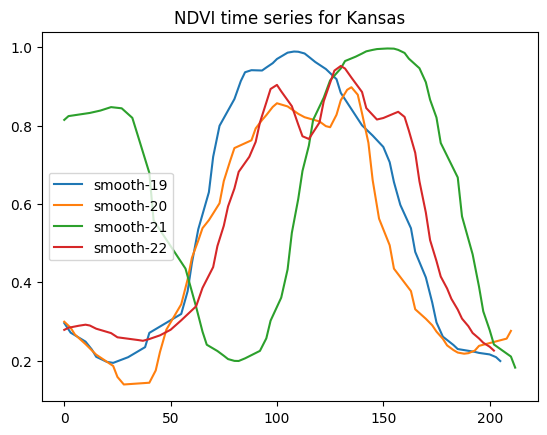

In [83]:
plt.title('NDVI time series for Kansas')
plt.plot(days_19, ndvi_smooth_19, label='smooth-19')
plt.plot(days_20, ndvi_smooth_20, label='smooth-20')
plt.plot(days_21, ndvi_smooth_21, label='smooth-21')
plt.plot(days_22, ndvi_smooth_22, label='smooth-22')
plt.legend()
plt.show()

In [84]:
# Apply an interpolation by splines.
x_19, y_19 = utils.interpolate_curve(days_19, ndvi_smooth_19)
x_20, y_20 = utils.interpolate_curve(days_20, ndvi_smooth_20)
x_21, y_21 = utils.interpolate_curve(days_21, ndvi_smooth_21)
x_22, y_22 = utils.interpolate_curve(days_22, ndvi_smooth_22)

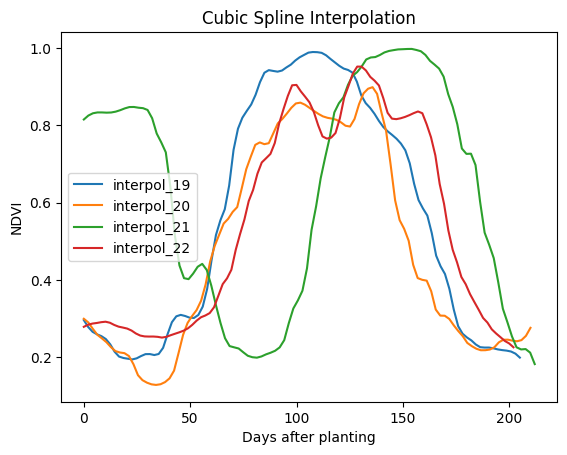

In [85]:
plt.plot(x_19, y_19, label='interpol_19')
plt.plot(x_20, y_20, label='interpol_20')
plt.plot(x_21, y_21, label='interpol_21')
plt.plot(x_22, y_22, label='interpol_22')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Days after planting')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [86]:
x = np.concatenate((x_19, x_20, x_21, x_22), axis=0)
y = np.concatenate((y_19, y_20, y_21, y_22), axis=0)

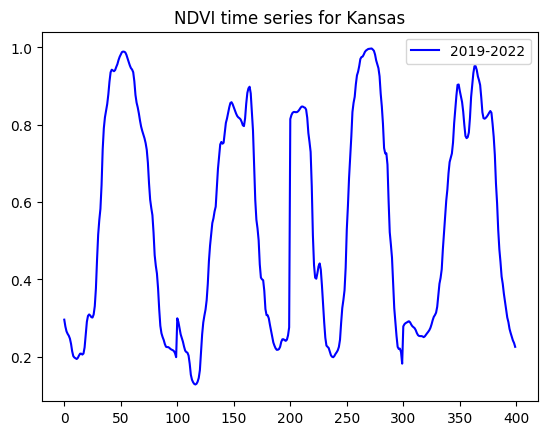

In [87]:
plt.title('NDVI time series for Kansas')
plt.plot([i for i in range(len(y))], y, 'b', label='2019-2022')
plt.legend()
plt.show()

In [88]:
# Save the clean data to a DataFrame.
data = pd.DataFrame({
    'x_19' : x_19, 'y_19' : y_19,
    'x_20' : x_20, 'y_20' : y_20,
    'x_21' : x_21, 'y_21' : y_21,
    'x_22' : x_22, 'y_22' : y_22
})

In [89]:
data.to_csv('smoothed_data_kansas.csv', index=False)